In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/liver-cancer-predictions/liver_cancer_prediction.csv")
df.head()

,Country,Region,Population,Incidence_Rate,Mortality_Rate,Gender,Age,Alcohol_Consumption,Smoking_Status,Hepatitis_B_Status,...,Herbal_Medicine_Use,Healthcare_Access,Screening_Availability,Treatment_Availability,Liver_Transplant_Access,Ethnicity,Preventive_Care,Survival_Rate,Cost_of_Treatment,Prediction
0,Nigeria,Sub-Saharan Africa,340672131,15.381360,6.160480,Male,81,Low,Smoker,Negative,...,No,Poor,Available,Available,No,Hispanic,Good,17.724793,47486.167423,Yes
1,United Kingdom,Europe,1054632817,3.306101,14.392985,Male,87,Low,Smoker,Negative,...,Yes,Good,Available,Not Available,No,Mixed,Moderate,19.558853,13782.265151,No
2,India,South Asia,751241440,9.325053,12.777878,Male,34,Moderate,Smoker,Negative,...,No,Good,Not Available,Not Available,No,Mixed,Moderate,68.468892,25308.034132,No
3,Colombia,South America,1167333367,9.399658,8.634609,Male,63,Low,Non-Smoker,Positive,...,No,Good,Not Available,Not Available,Yes,Hispanic,Moderate,18.200287,38221.622202,No
4,Iran,Middle East,1082070787,9.665663,12.422518,Male,85,High,Non-Smoker,Positive,...,Yes,Moderate,Available,Available,Yes,Mixed,Moderate,45.019153,26765.301404,No


In [3]:
df.shape

(160292, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160292 entries, 0 to 160291
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  160292 non-null  object 
 1   Region                   160292 non-null  object 
 2   Population               160292 non-null  int64  
 3   Incidence_Rate           160292 non-null  float64
 4   Mortality_Rate           160292 non-null  float64
 5   Gender                   160292 non-null  object 
 6   Age                      160292 non-null  int64  
 7   Alcohol_Consumption      160292 non-null  object 
 8   Smoking_Status           160292 non-null  object 
 9   Hepatitis_B_Status       160292 non-null  object 
 10  Hepatitis_C_Status       160292 non-null  object 
 11  Obesity                  160292 non-null  object 
 12  Diabetes                 160292 non-null  object 
 13  Rural_or_Urban           160292 non-null  object 
 14  Seaf

As you see above, the code has many 'object' type variables which the model is unable to use this type of variable for prediction, so we need to convert this variables to 'int' types.

In [5]:
# Check if there are duplicate variables
df.isna().sum()

Country                    0
Region                     0
Population                 0
Incidence_Rate             0
Mortality_Rate             0
Gender                     0
Age                        0
Alcohol_Consumption        0
Smoking_Status             0
Hepatitis_B_Status         0
Hepatitis_C_Status         0
Obesity                    0
Diabetes                   0
Rural_or_Urban             0
Seafood_Consumption        0
Herbal_Medicine_Use        0
Healthcare_Access          0
Screening_Availability     0
Treatment_Availability     0
Liver_Transplant_Access    0
Ethnicity                  0
Preventive_Care            0
Survival_Rate              0
Cost_of_Treatment          0
Prediction                 0
dtype: int64

In [6]:
# Checks the sum of all duplicate values
df.duplicated().sum()

0

In [7]:
# Checks the unique values of the features
df.nunique()

Country                        30
Region                         10
Population                 160288
Incidence_Rate             160292
Mortality_Rate             160292
Gender                          2
Age                            70
Alcohol_Consumption             3
Smoking_Status                  2
Hepatitis_B_Status              2
Hepatitis_C_Status              2
Obesity                         4
Diabetes                        2
Rural_or_Urban                  2
Seafood_Consumption             3
Herbal_Medicine_Use             2
Healthcare_Access               3
Screening_Availability          2
Treatment_Availability          2
Liver_Transplant_Access         2
Ethnicity                       5
Preventive_Care                 3
Survival_Rate              160292
Cost_of_Treatment          160292
Prediction                      2
dtype: int64

In [8]:
df['Prediction'].value_counts()

Prediction
No     120270
Yes     40022
Name: count, dtype: int64

# Under Sampling treatment

There are too many samples in the Prediction target variable, we need to remove a bit of the excessive data and use only the necessary data for the prediction

In [9]:
# Let's undersample the 'No' result in the Prediction variable
df_0 = df[df['Prediction']=='No'][:df['Prediction'].value_counts()[1]].reset_index()
len(df_0)

40022

In [10]:
# Now let's do the same for the 'Yes' value
df_1 = df[df['Prediction']=="Yes"].reset_index()
df = pd.concat([df_1, df_0],axis=0)
df['Prediction'].value_counts()

Prediction
Yes    40022
No     40022
Name: count, dtype: int64

In [11]:
# Now that the amount of 'No' and 'Yes' values of the features are the same, we need to insert this values on the dataset
df.drop('index',axis=1,inplace=True)
df.head()

,Country,Region,Population,Incidence_Rate,Mortality_Rate,Gender,Age,Alcohol_Consumption,Smoking_Status,Hepatitis_B_Status,...,Herbal_Medicine_Use,Healthcare_Access,Screening_Availability,Treatment_Availability,Liver_Transplant_Access,Ethnicity,Preventive_Care,Survival_Rate,Cost_of_Treatment,Prediction
0,Nigeria,Sub-Saharan Africa,340672131,15.381360,6.160480,Male,81,Low,Smoker,Negative,...,No,Poor,Available,Available,No,Hispanic,Good,17.724793,47486.167423,Yes
1,Russia,Europe,199661331,2.558179,2.853576,Female,26,High,Smoker,Negative,...,Yes,Good,Not Available,Available,No,African,Moderate,70.343535,22372.868376,Yes
2,Pakistan,South Asia,250747461,2.306748,1.979092,Female,51,Moderate,Smoker,Positive,...,Yes,Good,Not Available,Not Available,No,Hispanic,Moderate,31.998948,34678.734550,Yes
3,Spain,Europe,1064536069,27.817193,3.956064,Male,24,Moderate,Non-Smoker,Negative,...,Yes,Moderate,Available,Available,No,Asian,Moderate,17.351788,33694.359070,Yes
4,China,Eastern Asia,13915613,4.843548,22.344428,Female,73,Low,Non-Smoker,Negative,...,No,Good,Not Available,Available,No,Asian,Moderate,38.051629,6036.999043,Yes


# Target Encoding

In [12]:
df['Prediction'] = df['Prediction'].map({'Yes': 1, 'No': 0})
df.head()

,Country,Region,Population,Incidence_Rate,Mortality_Rate,Gender,Age,Alcohol_Consumption,Smoking_Status,Hepatitis_B_Status,...,Herbal_Medicine_Use,Healthcare_Access,Screening_Availability,Treatment_Availability,Liver_Transplant_Access,Ethnicity,Preventive_Care,Survival_Rate,Cost_of_Treatment,Prediction
0,Nigeria,Sub-Saharan Africa,340672131,15.381360,6.160480,Male,81,Low,Smoker,Negative,...,No,Poor,Available,Available,No,Hispanic,Good,17.724793,47486.167423,1
1,Russia,Europe,199661331,2.558179,2.853576,Female,26,High,Smoker,Negative,...,Yes,Good,Not Available,Available,No,African,Moderate,70.343535,22372.868376,1
2,Pakistan,South Asia,250747461,2.306748,1.979092,Female,51,Moderate,Smoker,Positive,...,Yes,Good,Not Available,Not Available,No,Hispanic,Moderate,31.998948,34678.734550,1
3,Spain,Europe,1064536069,27.817193,3.956064,Male,24,Moderate,Non-Smoker,Negative,...,Yes,Moderate,Available,Available,No,Asian,Moderate,17.351788,33694.359070,1
4,China,Eastern Asia,13915613,4.843548,22.344428,Female,73,Low,Non-Smoker,Negative,...,No,Good,Not Available,Available,No,Asian,Moderate,38.051629,6036.999043,1


In [13]:
# Seperate the features and target
X = df.drop(columns=['Prediction'])
y = df['Prediction']

# Seperates the categorical columns of the features
categorical_columns = [#'Country', #'Region', #'Gender', 
    'Alcohol_Consumption', #'Smoking_Status',
       #'Hepatitis_B_Status', 'Hepatitis_C_Status', 
    'Obesity', #'Diabetes',
       #'Rural_or_Urban', 
    'Seafood_Consumption', #'Herbal_Medicine_Use',
       'Healthcare_Access', #'Screening_Availability', 'Treatment_Availability',
       #'Liver_Transplant_Access', 'Ethnicity', 'Preventive_Care'
]
# Encodes the features into the categorical columns of the dataset
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X[categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns])

# One-hot encoding of the 
X['Country'] = X['Country'].map(X['Country'].value_counts())
X['Region'] = X['Region'].map(X['Region'].value_counts())


print("Preprocessing complete. Data is ready for modeling.")

Preprocessing complete. Data is ready for modeling.


In [14]:
X.head()

,Country,Region,Population,Incidence_Rate,Mortality_Rate,Gender,Age,Alcohol_Consumption,Smoking_Status,Hepatitis_B_Status,...,Seafood_Consumption,Herbal_Medicine_Use,Healthcare_Access,Screening_Availability,Treatment_Availability,Liver_Transplant_Access,Ethnicity,Preventive_Care,Survival_Rate,Cost_of_Treatment
0,2658,16065,340672131,15.381360,6.160480,Male,81,1.0,Smoker,Negative,...,2.0,No,2.0,Available,Available,No,Hispanic,Good,17.724793,47486.167423
1,2655,16004,199661331,2.558179,2.853576,Female,26,0.0,Smoker,Negative,...,2.0,Yes,0.0,Not Available,Available,No,African,Moderate,70.343535,22372.868376
2,2688,8021,250747461,2.306748,1.979092,Female,51,2.0,Smoker,Positive,...,2.0,Yes,0.0,Not Available,Not Available,No,Hispanic,Moderate,31.998948,34678.734550
3,2681,16004,1064536069,27.817193,3.956064,Male,24,2.0,Non-Smoker,Negative,...,1.0,Yes,1.0,Available,Available,No,Asian,Moderate,17.351788,33694.359070
4,2632,7933,13915613,4.843548,22.344428,Female,73,1.0,Non-Smoker,Negative,...,2.0,No,0.0,Not Available,Available,No,Asian,Moderate,38.051629,6036.999043


In [15]:
le = LabelEncoder()

In [16]:
# Seperates the categorical features and numerical features
df_cat = X.select_dtypes(include='object')
df_num = X.select_dtypes(exclude='object')

In [17]:
df_cat.head()

,Gender,Smoking_Status,Hepatitis_B_Status,Hepatitis_C_Status,Diabetes,Rural_or_Urban,Herbal_Medicine_Use,Screening_Availability,Treatment_Availability,Liver_Transplant_Access,Ethnicity,Preventive_Care
0,Male,Smoker,Negative,Negative,No,Rural,No,Available,Available,No,Hispanic,Good
1,Female,Smoker,Negative,Negative,Yes,Rural,Yes,Not Available,Available,No,African,Moderate
2,Female,Smoker,Positive,Positive,No,Rural,Yes,Not Available,Not Available,No,Hispanic,Moderate
3,Male,Non-Smoker,Negative,Negative,Yes,Urban,Yes,Available,Available,No,Asian,Moderate
4,Female,Non-Smoker,Negative,Positive,Yes,Rural,No,Not Available,Available,No,Asian,Moderate


In [18]:
# Let's add the categorical features onto the columns of the dataset
for col in df_cat:
    df_cat[col]=le.fit_transform(df_cat[col])

In [19]:
# Now let's concatenate the numerical and categorical features as one inside the X variable
X = pd.concat([df_cat,df_num],axis=1)
X.head()

,Gender,Smoking_Status,Hepatitis_B_Status,Hepatitis_C_Status,Diabetes,Rural_or_Urban,Herbal_Medicine_Use,Screening_Availability,Treatment_Availability,Liver_Transplant_Access,...,Population,Incidence_Rate,Mortality_Rate,Age,Alcohol_Consumption,Obesity,Seafood_Consumption,Healthcare_Access,Survival_Rate,Cost_of_Treatment
0,1,1,0,0,0,0,0,0,0,0,...,340672131,15.381360,6.160480,81,1.0,0.0,2.0,2.0,17.724793,47486.167423
1,0,1,0,0,1,0,1,1,0,0,...,199661331,2.558179,2.853576,26,0.0,1.0,2.0,0.0,70.343535,22372.868376
2,0,1,1,1,0,0,1,1,1,0,...,250747461,2.306748,1.979092,51,2.0,2.0,2.0,0.0,31.998948,34678.734550
3,1,0,0,0,1,1,1,0,0,0,...,1064536069,27.817193,3.956064,24,2.0,3.0,1.0,1.0,17.351788,33694.359070
4,0,0,0,1,1,0,0,1,0,0,...,13915613,4.843548,22.344428,73,1.0,2.0,2.0,0.0,38.051629,6036.999043


# Train and testing data split
Now let's seperate the train and test data and initialize the Logistic Regression model

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
model = DecisionTreeClassifier(random_state=42,class_weight='balanced')
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [22]:
# With the Logistic Regression model initialized now we only need to create the prediction with the test variables
y_pred = model.predict(X_test)

In [23]:
# Now that we have the predicted model ready, we just need to evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

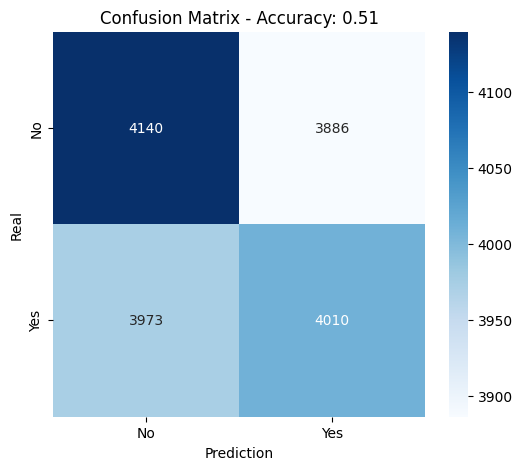

In [24]:
# Now let's create a confusion matrix graph
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title(f"Confusion Matrix - Accuracy: {accuracy:.2f}")
plt.show()

In [25]:
print(class_report)

              precision    recall  f1-score   support

           0       0.51      0.52      0.51      8026
           1       0.51      0.50      0.51      7983

    accuracy                           0.51     16009
   macro avg       0.51      0.51      0.51     16009
weighted avg       0.51      0.51      0.51     16009



# Most Important Features

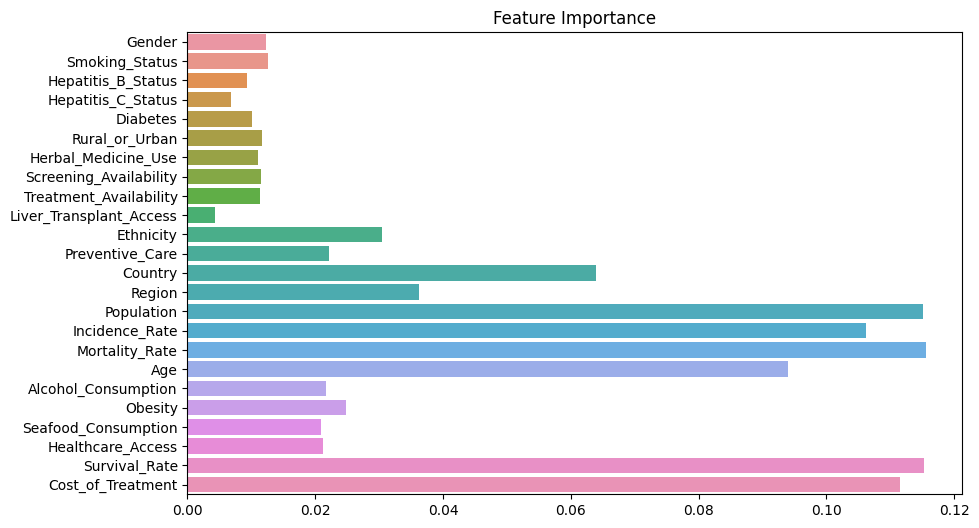

In [26]:
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.show()